In [1]:
import networkx as nx
import pandas as pd
import numpy as np


In [2]:
from google.cloud import bigquery
from google.oauth2 import service_account


credentials = service_account.Credentials.from_service_account_file('../references/Scam Transaction Detection-031b9e755035.json')
project_id = 'scam-transaction-detection'
client = bigquery.Client(credentials=credentials, project=project_id)
# bqstorageclient = bigquery_storage_v1beta1.BigQueryStorageClient(
#     credentials=credentials
# )

In [3]:
address = '0x005d069799675a6f9435f8a0dca98aaab88273bcfe'

query = F"""
SELECT
  txns.hash
  ,txns.nonce
  ,txns.transaction_index
  ,txns.from_address
  ,txns.to_address
  ,txns.value
  ,txns.gas
  ,txns.gas_price
  ,txns.receipt_cumulative_gas_used
  ,txns.receipt_gas_used
  ,txns.receipt_contract_address
  ,txns.receipt_status
  ,txns.block_timestamp
FROM
  `bigquery-public-data.crypto_ethereum.transactions` AS txns
WHERE TRUE
  AND txns.value > 0
  AND (txns.from_address = "{address}" OR txns.to_address = "{address}")
"""

In [4]:
query_job = client.query(query)

iterator = query_job.result(timeout=30)
# rows = list(iterator)

# # Transform the rows into a nice pandas dataframe
# df = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

# # Look at the first 10
# df.head(10)

In [ ]:
df.shape

In [6]:
scam_address = '0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1'


query = F"""
SELECT
  txns.hash
  ,txns.nonce
  ,txns.transaction_index
  ,txns.from_address
  ,txns.to_address
  ,txns.value
  ,txns.gas
  ,txns.gas_price
  ,txns.receipt_cumulative_gas_used
  ,txns.receipt_gas_used
  ,txns.receipt_contract_address
  ,txns.receipt_status
  ,txns.block_timestamp
FROM
  `bigquery-public-data.crypto_ethereum.transactions` AS txns
WHERE TRUE
  AND txns.value > 0
  AND (txns.from_address = "{scam_address}" OR txns.to_address = "{scam_address}")
"""

In [7]:
query_job = client.query(query)

iterator = query_job.result(timeout=30)
rows = list(iterator)
# Transform the rows into a nice pandas dataframe
df = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

# Look at the first 10
df.head(10)

In [9]:
pd.to_datetime("2019-11-29 16:25:57")

Timestamp('2019-11-29 16:25:57')

In [10]:
# Transform the rows into a nice pandas dataframe
df = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

# Look at the first 10
df.head(10)

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_status,block_timestamp
0,0x434777237fbc39810e86ff8c7bf3038ccf8c90b12778...,2,127,0xca6dc892936ad141c5742684eb5807776b98844f,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,10000000000000000,21000,3600000000,6406665,21000,None,1,2019-02-13 04:08:34+00:00
1,0x1f1e5a28f0b2e84353b3da6914369447f2a6f5b79034...,2,86,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,8950000000000000,21000,5000000000,3506936,21000,None,1,2019-02-13 04:12:52+00:00
2,0xc2d350824462519b3240d611cbfc8e7488e2fb08cb80...,109,41,0x1ae5fb280706dabc49cc3022e73e52132a155a07,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,100000000000000,25200,5100000000,2757114,21000,None,1,2019-02-13 20:42:31+00:00
3,0xc29e819b57ab0dd74a14be3b87501936b44f819adfa0...,30,24,0xf49874712828e3d73a12c15f9f77c5529eb0632f,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,688000000000000000,21000,5000000000,957879,21000,None,1,2020-01-01 08:38:56+00:00
4,0x592c5ba2690dfe3901a884845321274fe8b542d952b4...,74,60,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,747979000000000000,21000,1000000000,3831016,21000,None,1,2020-01-01 20:11:09+00:00
5,0x9f8f22136a21799bc65710eb672f54cc570edf432698...,32,30,0xf49874712828e3d73a12c15f9f77c5529eb0632f,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,748000000000000000,21000,5000000000,1544827,21000,None,1,2020-01-01 20:07:16+00:00
6,0x5250b1202defb8122f3d867387a790efd5046666bc7b...,73,42,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,797979000000000000,21000,1000000000,8535415,21000,None,1,2020-01-01 19:18:28+00:00
7,0xec11cd4ea849b8623a9198c9e0bd150769eebb14ad23...,72,83,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,0x4fed1fc4144c223ae3c1553be203cdfcbd38c581,687895000000000000,21000,5000000000,5267489,21000,None,1,2020-01-01 08:43:50+00:00
8,0x288ba0dc22386c645bed414dd4cbcb49d258a8aceef0...,31,53,0xf49874712828e3d73a12c15f9f77c5529eb0632f,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,798000000000000000,21000,6000000000,5098628,21000,None,1,2020-01-01 19:13:30+00:00
9,0x28cf6efaee09ca5b11c61ba1a2d989b220872b64ffeb...,1,98,0xd059777246d203e002c254d50ab4f1f2ae2c4acc,0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1,1236000000000000000,21000,1000000000,6391956,21000,None,1,2019-07-18 20:10:51+00:00


In [11]:
df.shape

(273, 13)

In [12]:
from datetime import timedelta
date = pd.to_datetime("2019-11-29 16:25:57")
date

Timestamp('2019-11-29 16:25:57')

In [13]:
scam_address = '0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1'
date = "2019-11-29 16:25:57"
date = pd.to_datetime(date)
date_min = date - timedelta(minutes=5)
date_max = date + timedelta(minutes=5)


query = F"""
SELECT *
FROM
  `bigquery-public-data.crypto_ethereum.transactions` AS txns
WHERE TRUE
  AND txns.value > 0
  AND txns.block_timestamp >= "{date_min}"
  AND txns.block_timestamp <= "{date_max}"
  ORDER BY txns.block_timestamp
"""

In [14]:
query_job = client.query(query)

iterator = query_job.result(timeout=30)
rows = list(iterator)

In [15]:
# Transform the rows into a nice pandas dataframe
df = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

# Look at the first 10
df.head(10)

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_timestamp,block_number,block_hash
0,0xcd47723c71c1ccf7873c9ceb70f0ed42578d07b077c7...,0,9,0xc1049efca6a7ff37c41a12d238dc03b2e8529faf,0xb0fc4dcefcd0f994ff4dfad9e504011ba88675a0,17088280000000000,21000,10000000000,0x,4275151,21000,None,None,1,2019-11-29 16:21:03+00:00,9021968,0x5c3f802b9c92ce71d32949c3390c2abaab9b1ee6ccf5...
1,0xaed61abb51e674c81bed7d7945c72e838f535ab0d38c...,5914,63,0xb938c0469209f76eea200907e0b62cc8a46e137d,0xdca8ce0f53c12b3f517d5ed0b31e814fa7303414,650000000000000,21000,10000000000,0x,6631945,21000,None,None,1,2019-11-29 16:21:03+00:00,9021968,0x5c3f802b9c92ce71d32949c3390c2abaab9b1ee6ccf5...
2,0xf3f7790175a0273a0e7ada985d801922d8141c7b1c00...,1946,103,0x75e6de78c9968c6b5faba747d73de70787591aac,0x50e65e5c11b454ea32840fc67a8ad6ab68629bef,449000000000000000,21000,10000000000,0x,9943762,21000,None,None,1,2019-11-29 16:21:03+00:00,9021968,0x5c3f802b9c92ce71d32949c3390c2abaab9b1ee6ccf5...
3,0x503c53f37e1ec2ab4b4ee38a0376a716ad2735109256...,42,81,0xa0094a753a7ac0d67925bc85d43b0a265ebf75ff,0x1cbe66f567927d93f3168d166bc47c830f6a11f9,6929780000000000,21000,10000000000,0x,7812203,21000,None,None,1,2019-11-29 16:21:03+00:00,9021968,0x5c3f802b9c92ce71d32949c3390c2abaab9b1ee6ccf5...
4,0x48e4311543b1934a852ae6740aab19dc712f09411130...,5912,61,0xb938c0469209f76eea200907e0b62cc8a46e137d,0xab1e5b1a98f80e8c52cb2240c9522f8284489f71,650000000000000,21000,10000000000,0x,6589945,21000,None,None,1,2019-11-29 16:21:03+00:00,9021968,0x5c3f802b9c92ce71d32949c3390c2abaab9b1ee6ccf5...
5,0x291d200ef10e231436c7bf2ad878970828fe7ee60a19...,0,10,0xcf5974b990a95002feabe973ed75be677172f673,0xd40b4df94f9361ff10176e7216aeb1807418b19e,259635000000000000,21000,10000000000,0x,4296151,21000,None,None,1,2019-11-29 16:21:03+00:00,9021968,0x5c3f802b9c92ce71d32949c3390c2abaab9b1ee6ccf5...
6,0x0475f615f57e5e61db29abced7aa8ab316bb6bac2078...,5913,62,0xb938c0469209f76eea200907e0b62cc8a46e137d,0x45c815157939ef6b43c7d34870d5fbe5cd91a7a4,650000000000000,21000,10000000000,0x,6610945,21000,None,None,1,2019-11-29 16:21:03+00:00,9021968,0x5c3f802b9c92ce71d32949c3390c2abaab9b1ee6ccf5...
7,0x07e6ea41068883798bfe667318d078d36cf441dfd2cb...,1812,67,0x60771c80604e6f1f087ca6b828270a2c1bded3a8,0x300a5a9948ffb2decdefc48deadde34db88c76c0,103500000000000000,21000,10000000000,0x,6719877,21000,None,None,1,2019-11-29 16:21:03+00:00,9021968,0x5c3f802b9c92ce71d32949c3390c2abaab9b1ee6ccf5...
8,0x8f2c327b0b57053c8f907e08eae4e629f9adf7e333db...,8,84,0xb5ce20ce7436bdce09cb3885c01d9ed57fcaba70,0x28c5f6d5ff62b4e2042a7780987cdebbc8fde601,40000000000000000,21000,10000000000,0x,7937075,21000,None,None,1,2019-11-29 16:21:03+00:00,9021968,0x5c3f802b9c92ce71d32949c3390c2abaab9b1ee6ccf5...
9,0xaeb091d01b128c1eb5e69eb938d42f46dd18b528cbda...,53,104,0xc17893de677bdd7aa8396533d7c8c5a6d9f38ded,0xecb4d2d53818864417cc486101e6c40998344c91,25000000000000000000,21000,10000000000,0x,9964762,21000,None,None,1,2019-11-29 16:21:03+00:00,9021968,0x5c3f802b9c92ce71d32949c3390c2abaab9b1ee6ccf5...


In [16]:
df.shape

(2209, 17)

In [26]:
G = nx.from_pandas_edgelist(df, source='from_address', target='to_address', edge_attr=['value', 'nonce', 'block_timestamp'], create_using=nx.MultiDiGraph)



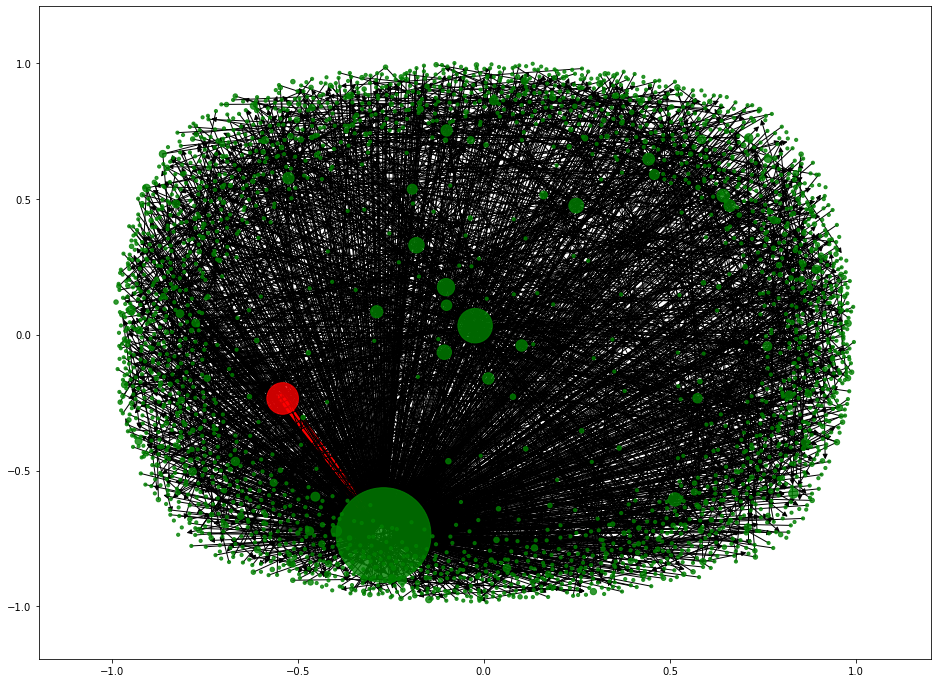

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12)) 
d = dict(G.degree)
d["0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1"] = 100
color_map = []
edge_size = []
edge_color_map = []
for u, v in G.edges():
    if u == "0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1" or v == "0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1":
        edge_color_map.append("red")
        edge_size.append(10)
    else:
        edge_color_map.append("black")
        edge_size.append(1)

for node in G:
    if node == "0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1":
        color_map.append('red')
    else: 
        color_map.append('green')
pos = nx.spring_layout(G, k=0.3, iterations=20)
nx.draw_networkx_nodes(G, pos=pos, node_color=color_map, 
        node_size=[v * 10 for v in d.values()], alpha=0.8)
nx.draw_networkx_edges(G, pos, width=edge_size, edge_color=edge_color_map)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12)) 
d = dict(G.degree)
d["0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1"] = 100
color_map = []
edge_color_map = []
for u, v in G.edges():
    if u == "0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1" or v == "0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1":
        edge_color_map.append("blue")
    else:
        edge_color_map.append("black")
for node in G:
    if node == "0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1":
        color_map.append('blue')
    else: 
        color_map.append('red')
pos = nx.circular_layout(G, scale=2)
pos
pos["0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1"] = np.array([0, 0])
nx.draw(G, pos=pos, node_color=color_map, edge_color=edge_color_map, 
        node_size=[v * 10 for v in d.values()], arrows=True, alpha=0.5)
plt.show()

In [64]:
for e in G.edges():
    print(e)
    break

('0xc1049efca6a7ff37c41a12d238dc03b2e8529faf', '0xb0fc4dcefcd0f994ff4dfad9e504011ba88675a0')
